# Sprint 8: Predicting Beta Bank Customer Attrition

## Prompt

Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.

We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank.

Build a model with the maximum possible F1 score. To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set.

Additionally, measure the AUC-ROC metric and compare it with the F1.

## Introduction

For this project I will be using the dataset 'Churn' which contains information about Beta Bank clients, including whether or not they are still with the company. Other features include: 

RowNumber — data string index

CustomerId — unique customer identifier

Surname — surname

CreditScore — credit score

Geography — country of residence

Gender — gender

Age — age

Tenure — period of maturation for a customer’s fixed deposit (years)

Balance — account balance

NumOfProducts — number of banking products used by the customer

HasCrCard — customer has a credit card

IsActiveMember — customer’s activeness

EstimatedSalary — estimated salary

The goal of this project is to create a model that will predict whether or not Beta Bank customers will leave or stay with the bank based on the information available in the dataset mentioned previously.

I will begin by preparing the data: checking for missing/duplicate data as well as encoding features and deleting abundant features as they could confuse the models and lead to inaccuracy.

Next, I will split the data and train the data without taking into account imbalance. Then, I will fix the imbalance and train the data once again. Finally, I will upsample and downsample the data and train again in order to find the model with the highest F1 Score.

I will conclude by testing the final model and offering my findings.

##  Uploading and preparing data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.utils import shuffle
from matplotlib import pyplot as plt

importing necessary libraries

In [2]:
churn = pd.read_csv('/datasets/Churn.csv')

### Examining the data

In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
churn.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


After examining data types and getting a general look at the data, data types all seem appropriate, however I will change feature titles to make it user friendly and easier to read. Furthermore, columns 'RowNumber', 'CustomerId', and 'Surname' are all irrelevant to the model and keeping them runs the risk of an inaccurate model, therefore I will remove them. Lastly, I can see in info() that the only column with missing values is 'tenure'.

### Dropping irrelevant features 

In [5]:
churn = churn.drop(columns=['RowNumber','CustomerId','Surname'])

Removed irrelevant columns. This will make it easier for the machine to notice patterns since there won't be an irrelevant column.

In [6]:
churn = churn.rename(
columns={
    'CreditScore' : 'credit_score',
    'Geography' : 'geography',
    'Gender' : 'gender',
    'Age' : 'age',
    'Tenure' : 'tenure',
    'Balance' : 'balance',
    'NumOfProducts' : 'num_of_products',
    'HasCrCard' : 'has_cr_card',
    'IsActiveMember' : 'is_active_member',
    'EstimatedSalary' : 'est_salary',
    'Exited' : 'exited'
})

In [7]:
churn.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,est_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


ensured changes were made

### Checking for duplicates

In [8]:
churn.duplicated().sum()

0

checked for exact duplicates, none found

### Taking care of missing values

In [9]:
churn['tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

seeing that there are already 382 '0' values in this column, it would not be beneficial and would skew results to replace Nan values with '0'. Therefore, I will be replacing missing values with the median value of the tenure column.

In [10]:
churn['tenure'] = churn['tenure'].fillna(value=churn['tenure'].median())

In [11]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  float64
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   est_salary        10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


ensured missing values were replaced

### Encoding categorical features

In [12]:
churn = pd.get_dummies(churn, drop_first=True, columns=['geography','gender'])

encoding categorical features to numerical to make the model run more efficiently

In [13]:
churn.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,est_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


ensured necessary changes were made

## EDA

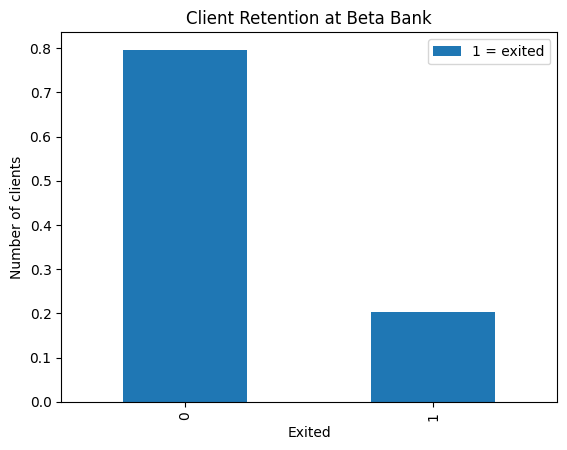

In [14]:
churn['exited'].value_counts(normalize=True).plot(kind='bar', title='Client Retention at Beta Bank', xlabel = 'Exited', ylabel = 'Number of clients')
plt.legend(['1 = exited', '0 = current client'])

Bar graph shows that far more clients in the dataframe are currently still with Beta compared to those who have exited, indicating a class imbalance.

## Creating a model

### Splitting the data

In [15]:
train_valid, test = train_test_split(churn, test_size = .2, random_state=12345)
train, valid = train_test_split(train_valid, test_size = .25, random_state=12345)

In [16]:
features_train = train.drop(['exited'], axis=1)
target_train = train['exited']
features_valid = valid.drop(['exited'], axis=1)
target_valid = valid['exited']
features_test = test.drop(['exited'], axis=1)
target_test = test['exited']

In [17]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


ensured splitting was done correctly

### Scaling

In [18]:
numeric = ['credit_score', 'age', 'tenure', 'balance','num_of_products', 'has_cr_card', 'is_active_member', 'est_salary']

In [19]:
scaler = StandardScaler()
features_train[numeric] = scaler.fit_transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

standardized data so that all features are weighted equally by model

### Training the model without taking into account imbalance

#### Decision Tree

In [20]:
for depth in range(1, 20, 2):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)[:,1]
    
    print('max_depth =', depth)
    print(' F1 =', f1_score(target_valid, predicted_valid))
    print(' AUC-ROC =', roc_auc_score(target_valid, predicted_valid))

max_depth = 1
 F1 = 0.0
 AUC-ROC = 0.5
max_depth = 3
 F1 = 0.39382239382239387
 AUC-ROC = 0.6226659821114924
max_depth = 5
 F1 = 0.5488372093023256
 AUC-ROC = 0.7024148054660566
max_depth = 7
 F1 = 0.5583596214511041
 AUC-ROC = 0.7058330776848261
max_depth = 9
 F1 = 0.5357142857142857
 AUC-ROC = 0.6987930741242914
max_depth = 11
 F1 = 0.5131964809384164
 AUC-ROC = 0.6877379319333863
max_depth = 13
 F1 = 0.49657064471879286
 AUC-ROC = 0.6826697333890727
max_depth = 15
 F1 = 0.4993288590604027
 AUC-ROC = 0.6856453230628863
max_depth = 17
 F1 = 0.4916773367477593
 AUC-ROC = 0.6839953967373422
max_depth = 19
 F1 = 0.49748743718592964
 AUC-ROC = 0.6888712628294488


F1 score and AUC-ROC score grow and decline simultaneously with both reaching their peak at a max depth of 7, however, these scores are not high enough to indicate an accurate model. F1 score does not exceed .59.

#### Random Forest Classifier

In [21]:
for estim in range(10, 101, 5):
    model = RandomForestClassifier(n_estimators=estim, random_state=12345)
    
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)[:,1]
    
    print('n_estimators =', estim)
    print(' F1 =', f1_score(target_valid, predicted_valid))
    print(' AUC-ROC =', roc_auc_score(target_valid, predicted_valid))

n_estimators = 10
 F1 = 0.5197368421052632
 AUC-ROC = 0.6837116666322269
n_estimators = 15
 F1 = 0.5522620904836194
 AUC-ROC = 0.7036578135456091
n_estimators = 20
 F1 = 0.5369774919614148
 AUC-ROC = 0.6936668579394359
n_estimators = 25
 F1 = 0.5394321766561514
 AUC-ROC = 0.6962959312943974
n_estimators = 30
 F1 = 0.5451612903225806
 AUC-ROC = 0.6974674107760217
n_estimators = 35
 F1 = 0.5656249999999999
 AUC-ROC = 0.7103266631591161
n_estimators = 40
 F1 = 0.5564387917329093
 AUC-ROC = 0.7042077889874571
n_estimators = 45
 F1 = 0.56875
 AUC-ROC = 0.711916187557521
n_estimators = 50
 F1 = 0.554140127388535
 AUC-ROC = 0.7029290166089404
n_estimators = 55
 F1 = 0.5606299212598425
 AUC-ROC = 0.7071118500633427
n_estimators = 60
 F1 = 0.5530546623794211
 AUC-ROC = 0.7016144799314598
n_estimators = 65
 F1 = 0.5646687697160884
 AUC-ROC = 0.7090121264816354
n_estimators = 70
 F1 = 0.5559105431309904
 AUC-ROC = 0.7035505206487167
n_estimators = 75
 F1 = 0.561014263074485
 AUC-ROC = 0.706765333

Once again, F1 score and AUC-ROC score grow and decline simultaneously with both reaching their peak when n_estimators = 35, however, these scores are not high enough to indicate an accurate model. F1 score does not exceed .59.

#### Logistic Regression

In [22]:
model =  LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)[:,1]
print(' F1 =', f1_score(target_valid, predicted_valid))
print(' AUC-ROC =', roc_auc_score(target_valid, predicted_valid))

 F1 = 0.30131826741996237
 AUC-ROC = 0.5836566690880421


Logistic Regression does not produce an accurate model.

## Fixing imbalance

### Class weight adjustment

#### Decision Tree

In [23]:
for depth in range(1, 20, 2):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)[:,1]
    
    print('max_depth =', depth)
    print(' F1 =', f1_score(target_valid, predicted_valid))
    print(' AUC-ROC =', roc_auc_score(target_valid, predicted_valid))

max_depth = 1
 F1 = 0.4750733137829912
 AUC-ROC = 0.6898591522430575
max_depth = 3
 F1 = 0.49761677788369874
 AUC-ROC = 0.7103910388972516
max_depth = 5
 F1 = 0.5489078822412156
 AUC-ROC = 0.7536547139730321
max_depth = 7
 F1 = 0.5535353535353534
 AUC-ROC = 0.7493892252499129
max_depth = 9
 F1 = 0.5145631067961165
 AUC-ROC = 0.7226534248687451
max_depth = 11
 F1 = 0.48846960167714887
 AUC-ROC = 0.6954057976312907
max_depth = 13
 F1 = 0.47939262472885036
 AUC-ROC = 0.6862755694868538
max_depth = 15
 F1 = 0.46919431279620855
 AUC-ROC = 0.6739551658748186
max_depth = 17
 F1 = 0.4827586206896552
 AUC-ROC = 0.6807201817144292
max_depth = 19
 F1 = 0.4710327455919396
 AUC-ROC = 0.6720079984867727


#### Random Forest Classifier

In [24]:
for estim in range(10, 101, 5):
    model = RandomForestClassifier(n_estimators=estim, random_state=12345, class_weight='balanced')
    
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)[:,1]
    
    print('n_estimators =', estim)
    print(' F1 =', f1_score(target_valid, predicted_valid))
    print(' AUC-ROC =', roc_auc_score(target_valid, predicted_valid))

n_estimators = 10
 F1 = 0.5254515599343186
 AUC-ROC = 0.6865799634091483
n_estimators = 15
 F1 = 0.560126582278481
 AUC-ROC = 0.7064545817246022
n_estimators = 20
 F1 = 0.5451559934318554
 AUC-ROC = 0.6961171097995769
n_estimators = 25
 F1 = 0.5544871794871795
 AUC-ROC = 0.7025825002900882
n_estimators = 30
 F1 = 0.5575364667747165
 AUC-ROC = 0.7031682400309004
n_estimators = 35
 F1 = 0.5654281098546041
 AUC-ROC = 0.7073153091863383
n_estimators = 40
 F1 = 0.551948051948052
 AUC-ROC = 0.7002999432539789
n_estimators = 45
 F1 = 0.5576923076923078
 AUC-ROC = 0.7041720246884928
n_estimators = 50
 F1 = 0.542763157894737
 AUC-ROC = 0.6948383374210603
n_estimators = 55
 F1 = 0.5478119935170178
 AUC-ROC = 0.6983996668356861
n_estimators = 60
 F1 = 0.5326797385620915
 AUC-ROC = 0.6904162805446982
n_estimators = 65
 F1 = 0.5425361155698234
 AUC-ROC = 0.6965351547163573
n_estimators = 70
 F1 = 0.5365853658536586
 AUC-ROC = 0.6926630732818433
n_estimators = 75
 F1 = 0.5410628019323671
 AUC-ROC = 

#### Logistic Regresssion

In [25]:
model =  LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)

predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)[:,1]
print(' F1 =', f1_score(target_valid, predicted_valid))
print(' AUC-ROC =', roc_auc_score(target_valid, predicted_valid))

 F1 = 0.4750889679715302
 AUC-ROC = 0.6966217837960703


For all models, weight adjustment helped some of the algorithms but not enough to improve F1 score/AUC-ROC score substantially.

### Upsampling

In [26]:
def upsample(features, target, repeat):
    features_zeros = features[target ==0]
    features_ones = features[target ==1]
    target_zeros = target[target ==0]
    target_ones = target[target ==1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

Since balancing was not enough to improve F1 score, I used upsampling and will retry previous models with the upsampled data.

#### Decision Tree

In [27]:
for depth in range(1, 20, 2):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)[:,1]
    
    print('max_depth =', depth)
    print(' F1 =', f1_score(target_valid, predicted_valid))
    print(' AUC-ROC =', roc_auc_score(target_valid, predicted_valid))

max_depth = 1
 F1 = 0.4750733137829912
 AUC-ROC = 0.6898591522430575
max_depth = 3
 F1 = 0.5258741258741259
 AUC-ROC = 0.6981469324563397
max_depth = 5
 F1 = 0.5509964830011723
 AUC-ROC = 0.7299708004368013
max_depth = 7
 F1 = 0.5523193096008631
 AUC-ROC = 0.7403551633315797
max_depth = 9
 F1 = 0.5229357798165137
 AUC-ROC = 0.7129398412700935
max_depth = 11
 F1 = 0.5067567567567568
 AUC-ROC = 0.7031992357566693
max_depth = 13
 F1 = 0.4750869061413673
 AUC-ROC = 0.6791775482857774
max_depth = 15
 F1 = 0.4753694581280788
 AUC-ROC = 0.675951608519215
max_depth = 17
 F1 = 0.46830530401034925
 AUC-ROC = 0.6689966445139949
max_depth = 19
 F1 = 0.47058823529411764
 AUC-ROC = 0.6698931362746952


#### Random Forest Classifier

In [28]:
for estim in range(10, 101, 5):
    model = RandomForestClassifier(n_estimators=estim, random_state=12345)
    
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)[:,1]
    
    print('n_estimators =', estim)
    print(' F1 =', f1_score(target_valid, predicted_valid))
    print(' AUC-ROC =', roc_auc_score(target_valid, predicted_valid))

n_estimators = 10
 F1 = 0.562942008486563
 AUC-ROC = 0.7181177169978971
n_estimators = 15
 F1 = 0.5823129251700679
 AUC-ROC = 0.7332595264171007
n_estimators = 20
 F1 = 0.5766526019690577
 AUC-ROC = 0.726411855308773
n_estimators = 25
 F1 = 0.577716643741403
 AUC-ROC = 0.7293874449825869
n_estimators = 30
 F1 = 0.5742574257425742
 AUC-ROC = 0.7244758145915162
n_estimators = 35
 F1 = 0.5920873124147341
 AUC-ROC = 0.7386496036520913
n_estimators = 40
 F1 = 0.5802816901408451
 AUC-ROC = 0.728312131727066
n_estimators = 45
 F1 = 0.5980528511821975
 AUC-ROC = 0.7398210831337156
n_estimators = 50
 F1 = 0.5909090909090909
 AUC-ROC = 0.7333556926432043
n_estimators = 55
 F1 = 0.5850914205344585
 AUC-ROC = 0.7311804285039873
n_estimators = 60
 F1 = 0.5811965811965811
 AUC-ROC = 0.7276190990893615
n_estimators = 65
 F1 = 0.5862552594670406
 AUC-ROC = 0.7321484488626158
n_estimators = 70
 F1 = 0.5860597439544808
 AUC-ROC = 0.7304873958662828
n_estimators = 75
 F1 = 0.5859154929577465
 AUC-ROC = 0

#### Logistic Regression

In [29]:
model =  LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)

predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)[:,1]
print(' F1 =', f1_score(target_valid, predicted_valid))
print(' AUC-ROC =', roc_auc_score(target_valid, predicted_valid))

 F1 = 0.4794086589229145
 AUC-ROC = 0.688043915380079


After upsampling, the best model is RandomForest with n_estimators = 95 with an F1 score of .59 and AUC-ROC score of .73

### Downsampling

In [30]:
def downsample(features, target, fraction):
    features_zeros = features[target ==0]
    features_ones = features[target ==1]
    target_zeros = target[target ==0]
    target_ones = target[target ==1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, .3)


removing some data (downsampling) to see how this affects scores

#### Decision Tree

In [31]:
for depth in range(1, 20, 2):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)[:,1]
    
    print('max_depth =', depth)
    print(' F1 =', f1_score(target_valid, predicted_valid))
    print(' AUC-ROC =', roc_auc_score(target_valid, predicted_valid))

max_depth = 1
 F1 = 0.4750733137829912
 AUC-ROC = 0.6898591522430575
max_depth = 3
 F1 = 0.49761677788369874
 AUC-ROC = 0.7103910388972516
max_depth = 5
 F1 = 0.5568181818181818
 AUC-ROC = 0.7606700799053914
max_depth = 7
 F1 = 0.5498938428874736
 AUC-ROC = 0.7404624562284718
max_depth = 9
 F1 = 0.530901722391084
 AUC-ROC = 0.7312471885287203
max_depth = 11
 F1 = 0.4999999999999999
 AUC-ROC = 0.7112517663589877
max_depth = 13
 F1 = 0.48775894538606407
 AUC-ROC = 0.7031722138418963
max_depth = 15
 F1 = 0.4885635864592864
 AUC-ROC = 0.7062550964126023
max_depth = 17
 F1 = 0.481036077705828
 AUC-ROC = 0.6988574498624266
max_depth = 19
 F1 = 0.48319709355131696
 AUC-ROC = 0.7021795558550926


#### Random Forest Classifier

In [32]:
for estim in range(10, 101, 5):
    model = RandomForestClassifier(n_estimators=estim, random_state=12345)
    
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)[:,1]
    
    print('n_estimators =', estim)
    print(' F1 =', f1_score(target_valid, predicted_valid))
    print(' AUC-ROC =', roc_auc_score(target_valid, predicted_valid))

n_estimators = 10
 F1 = 0.5393013100436682
 AUC-ROC = 0.7294677159647063
n_estimators = 15
 F1 = 0.5508735868448099
 AUC-ROC = 0.7451348631975826
n_estimators = 20
 F1 = 0.5554359526372443
 AUC-ROC = 0.7429127080886129
n_estimators = 25
 F1 = 0.5480572597137015
 AUC-ROC = 0.7435811030981421
n_estimators = 30
 F1 = 0.5620360551431601
 AUC-ROC = 0.7496888505990122
n_estimators = 35
 F1 = 0.5571428571428572
 AUC-ROC = 0.7509072210503895
n_estimators = 40
 F1 = 0.5612565445026177
 AUC-ROC = 0.750728399555569
n_estimators = 45
 F1 = 0.5615462868769074
 AUC-ROC = 0.7547435381859395
n_estimators = 50
 F1 = 0.5600835945663531
 AUC-ROC = 0.7501068955157928
n_estimators = 55
 F1 = 0.5522842639593909
 AUC-ROC = 0.747763936552544
n_estimators = 60
 F1 = 0.5537190082644627
 AUC-ROC = 0.7466886232970233
n_estimators = 65
 F1 = 0.5494949494949496
 AUC-ROC = 0.7462101764531035
n_estimators = 70
 F1 = 0.5491803278688525
 AUC-ROC = 0.7442026071379183
n_estimators = 75
 F1 = 0.5491388044579534
 AUC-ROC =

#### Logistic Regression

In [33]:
model =  LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)

predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)[:,1]
print(' F1 =', f1_score(target_valid, predicted_valid))
print(' AUC-ROC =', roc_auc_score(target_valid, predicted_valid))

 F1 = 0.48590864917395526
 AUC-ROC = 0.6991213109125619


Downsampling did not produce scores as great as upsampling

### Findings
1) the best model is RandomForest Classifier + upsampling where n_estimators = 95
2) F1 score and AUC-ROC score grow simultaneously but the maximums for each don't always match

## Model testing

### Training using complete data

In [34]:
features_full_train = pd.concat([features_train, features_valid])
target_full_train = pd.concat([target_train, target_valid])

features_upsampled, target_upsampled = upsample(features_full_train, target_full_train, 3)

model = RandomForestClassifier(random_state=12345, n_estimators=95)
model.fit(features_upsampled, target_upsampled)

predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)[:,1]

print(' F1 =', f1_score(target_test, predicted_test))
print('AUC-ROC =', roc_auc_score(target_test, probabilities_test))

 F1 = 0.5938748335552596
AUC-ROC = 0.8519610047180838


## Conclusion

After training both imbalanced and balanced models as well as upsampling and downsampling, RandomForest Classifier produces the best model with n_estimators = 95. This is where the F1 scores reach .59 and AUC-ROC = .85.